In [3]:
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#Carregar o modelo
from keras.models import load_model
#salvar/carregar arquivos em diferentes formatos
import joblib

In [4]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens
modelo_maior_erro = load_model('/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_mAb_DENV1/modelo_mab_DENV_100_75_50_25_2022-12-15.h5')
modelo_maior_erro

In [5]:
#154 IMAGENS SEPARADAS RANDOMICAMENTE - 90%

X_test_maior_erro = joblib.load('/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_mAb_DENV1/3_images_de_X_test_mab_denv_melhor_modelo_200_epochs_90%_2022-12-15.gz') #carregando arquivo
X_test_maior_erro.shape

(411, 200, 200, 3)

In [6]:
#154 RÓTULOS

y_test_maior_erro = joblib.load('/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_mAb_DENV1/4_rotulos_de_y_test_mab_denv_melhor_model_200_epochs_90%_2022-12-15.gz') #carregando arquivo
y_test_maior_erro.shape

(411,)

In [7]:
#ROTULOS SALVOS EM LISTA

lista_observado_maior_erro = list(y_test_maior_erro)
len(lista_observado_maior_erro)

411

In [8]:
#PREDIÇÃO SALVO EM LISTA

dados_prev = modelo_maior_erro.predict(X_test_maior_erro)
lista_previsto_maior_erro = dados_prev.flatten().tolist()
len(lista_previsto_maior_erro)

13/13 [==============================] - 10s 698ms/step


411

In [9]:
import pandas as pd
from scipy.stats.stats import pearsonr as stats

In [10]:
#DATAFRAME - ORGANIZAÇÃO DAS LISTAS
#COLUNA 1 ROTULO/ COLUNA 2 PREDITO

df_maior_erro = pd.DataFrame(zip(lista_observado_maior_erro,lista_previsto_maior_erro), 
                             columns = ['Observed values','Lista preditos'])
df_maior_erro.head()

,Observed values,Lista preditos
0,297,367.346069
1,205,268.583801
2,696,666.167603
3,1083,1076.315430
4,1392,1213.200439


In [11]:
#ARREDONDANDO O PREDITO ('lista preditos')

teste = round(df_maior_erro['Lista preditos'],2)
df_maior_erro['Predicted values'] = teste
df_maior_erro.head()

,Observed values,Lista preditos,Predicted values
0,297,367.346069,367.35
1,205,268.583801,268.58
2,696,666.167603,666.17
3,1083,1076.315430,1076.32
4,1392,1213.200439,1213.20


In [12]:
#REORGANIZANDO AS COLUNAS

df_maior_erro = df_maior_erro.reindex(columns=['Observed values','Predicted values','Lista preditos'])
df_maior_erro.head()

,Observed values,Predicted values,Lista preditos
0,297,367.35,367.346069
1,205,268.58,268.583801
2,696,666.17,666.167603
3,1083,1076.32,1076.315430
4,1392,1213.20,1213.200439


In [13]:
#BIBLIOTECA CORRELAÇÃO
from scipy.stats.stats import spearmanr as spearman #importando a biblioteca para gráfico de correlação

In [14]:
#CALCULO DE CORRELAÇÃO

col1_obt = 0 #Observed value
col2_prev = 1 #Predicted values
pear_pos_maior_erro = stats(df_maior_erro[df_maior_erro.columns[col1_obt]], 
                            df_maior_erro[df_maior_erro.columns[col2_prev]])

<Figure size 1080x1080 with 0 Axes>

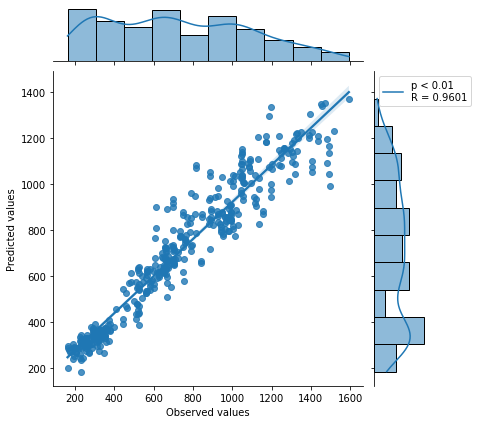

In [15]:
plt.figure(figsize=(15,15))
sns.jointplot(
    x=df_maior_erro.columns[col1_obt],
    y=df_maior_erro.columns[col2_prev],
    kind='reg',
    data=df_maior_erro#[df_maior_erro['Lista observado'] > 300]
)

if pear_pos_maior_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(round(pear_pos_maior_erro[1],4)) + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e r